Численные методы  
Лабораторная работа 7

$\dfrac{\partial^2 u}{\partial x^2} + \dfrac{\partial^2 u}{\partial y^2} = 0$  
$u(0,y) = y$  
$u(1,y) = 1 + y$  
$u(x,0) = x$  
$u(x,1) = 1 + x$

Решение: $u(x,y) = x + y$

$\dfrac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h_x^2} + \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h_y^2} + O(h_x^2 + h_y^2) = 0$

Метод Либмана:

$u_{i,j}^{(k+1)} = \dfrac{h_y^2}{h_x^2 + h_y^2}\dfrac{u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)}}{2} + \dfrac{h_x^2}{h_x^2 + h_y^2}\dfrac{u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)}}{2}$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def cond_1(y):
    return y
def cond_2(y):
    return 1 + y
def cond_3(x):
    return x
def cond_4(x):
    return 1 + x
def analytical_solution(x, y):
    return x + y

In [3]:
x_begin = 0.0
x_end = 1.0
y_begin = 0.0
y_end = 1.0

def liebman_method(N_x = 30, N_y = 30, epsilon = 1e-5, max_iter = 10**4):
    h_x = (x_end - x_begin) / (N_x - 1)
    h_y = (y_end - y_begin) / (N_y - 1)
    
    x = np.linspace(x_begin, x_end, N_x)
    y = np.linspace(y_begin, y_end, N_y)
    
    X = [x for _ in range(N_y)]
    Y = [[y[i] for _ in x] for i in range(N_y)]
    ans = [[0 for _ in range(N_x)] for _ in range(N_y)]
    for i in range(N_x):
        coeff = (cond_4(X[-1][i]) - cond_3(X[0][i])) / (y_end - y_begin)
        bias = cond_3(X[0][i])
        for j in range(N_y):
            ans[j][i] = coeff * (Y[j][i] - y_begin) + bias
    
    coeffs = [h_x*h_x / (h_x*h_x + h_y*h_y), h_y*h_y / (h_x*h_x + h_y*h_y)]
    
    iter_number = 0
    norm = 2 * epsilon
    
    while(norm >= epsilon and iter_number < max_iter):
        last_line = [[0 for _ in range(N_x)] for _ in range(N_y)]
        norm = 0
        for i in range(1, N_y - 1):
            last_line[i][0] = cond_1(Y[i][0])
            diff = abs(last_line[i][0] - ans[i][0])
            norm = max(diff, norm)
            for j in range(1, N_x - 1):
                last_line[i][j] = (coeffs[0] * (ans[i][j-1] + ans[i][j+1]) / 2 + coeffs[1] * (ans[i-1][j] + ans[i+1][j]) / 2)
                diff = abs(last_line[i][j] - ans[i][j])
                norm = max(diff, norm)
            last_line[i][-1] = cond_2(Y[i][-1])
            diff = abs(last_line[i][-1] - ans[i][-1])
            norm = max(diff, norm)
        
        for i in range(1, N_y - 1):
            ans[i] = last_line[i]
            
        iter_number += 1
        
    return X, Y, ans

Метод верхних релаксаций:

In [4]:
x_begin = 0.0
x_end = 1.0
y_begin = 0.0
y_end = 1.0

def relaxation_method(N_x = 30, N_y = 30, epsilon = 1e-5, w = 0.01, max_iter = 10**4):
    h_x = (x_end - x_begin) / (N_x - 1)
    h_y = (y_end - y_begin) / (N_y - 1)
    
    x = np.linspace(x_begin, x_end, N_x)
    y = np.linspace(y_begin, y_end, N_y)
    
    X = [x for _ in range(N_y)]
    Y = [[y[i] for _ in x] for i in range(N_y)]
    ans = [[0 for _ in range(N_x)] for _ in range(N_y)]
    for i in range(N_x):
        coeff = (cond_4(X[-1][i]) - cond_3(X[0][i])) / (y_end - y_begin)
        bias = cond_3(X[0][i])
        for j in range(N_y):
            ans[j][i] = coeff * (Y[j][i] - y_begin) + bias
    
    coeffs = [h_x*h_x / (h_x*h_x + h_y*h_y), h_y*h_y / (h_x*h_x + h_y*h_y)]
    
    iter_number = 0
    norm = 2 * epsilon
    
    while(norm >= epsilon and iter_number < max_iter):
        norm = 0
        for i in range(1, N_y - 1):
            diff = w * (cond_1(Y[i][0]) - ans[i][0])
            ans[i][0] += diff
            diff = abs(diff)
            norm = max(diff, norm)
            for j in range(1, N_x - 1):
                diff = w * (coeffs[0] * (ans[i][j-1] + ans[i][j+1]) / 2 + coeffs[1] * (ans[i-1][j] + ans[i+1][j]) / 2 - ans[i][j])
                ans[i][j] += diff
                diff = abs(diff)
                norm = max(diff, norm)
            diff = w * (cond_2(Y[i][-1]) - ans[i][-1])
            ans[i][-1] += diff
            diff = abs(diff)
            norm = max(diff, norm)
        
        iter_number += 1
    return X, Y, ans

Метод зейделя:

In [5]:
def zeidel_method(N_x = 30, N_y = 30, epsilon = 1e-5):
    return relaxation_method(N_x=N_x, N_y=N_y, epsilon=epsilon, w=1.0)

Невязки методов:

In [6]:
def RMSE(x, y, approx, real_func):
    ans = 0.0
    for i in range(len(approx)):
        for j in range(len(approx[i])):
            ans += (approx[i][j] - real_func(x[i][j], y[i][j]))**2
    return (ans / (len(approx) * len(approx[i])))**0.5

In [7]:
def error_plot_data(solver, real_f):
    h, e = [], []
    for N in range(5, 80):
        x, y, ans = solver(N_x=N, N_y=N)
        h.append(1.0 / N)
        e.append(RMSE(x, y, ans, real_f))
    return h, e

In [8]:
def error_plot(method, method_name):
    plt.title("Зависимость погрешности от длины шага")
    h, e = error_plot_data(method, analytical_solution)
    
    plt.plot(h, e, label=method_name, color = "blue")
    plt.xlabel("мелкость разбиения")
    plt.ylabel("log(ошибка)")
    plt.legend()
    plt.grid()

In [9]:
def logerror_plot(method, method_name):
    plt.title("Зависимость логарифмической погрешности от длины шага по x и по y")
    h, e = error_plot_data(method, analytical_solution)
    e = [math.log(i + 1e-80) for i in e]
    
    plt.plot(h, e, label=method_name, color = "blue")
    plt.xlabel("h")
    plt.ylabel("log(ошибки)")
    plt.legend()
    plt.grid()

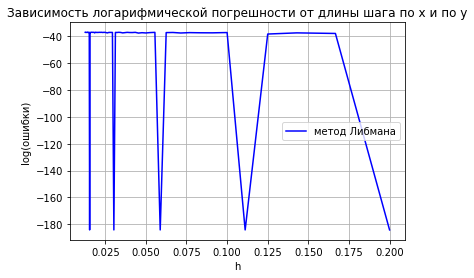

In [10]:
logerror_plot(liebman_method, "метод Либмана")

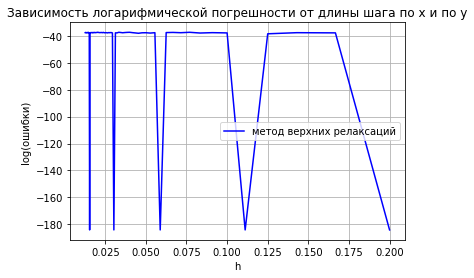

In [11]:
logerror_plot(relaxation_method, "метод верхних релаксаций")

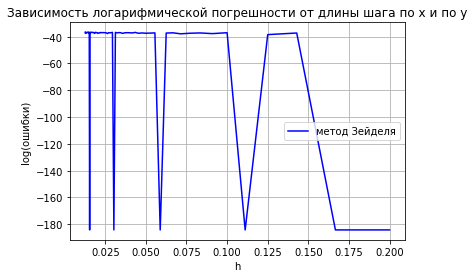

In [12]:
logerror_plot(zeidel_method, "метод Зейделя")

In [13]:
def R3_plot(method, method_name):
    X_e, Y_e, Z_e = method()
    z_plot = []
    for j in range(0, len(X_e), 1):
        tmp = []
        for i in range(0, len(X_e[j]), 1):
            tmp.append(analytical_solution(X_e[j][i], Y_e[j][i]))
        z_plot.append(tmp)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_e, Y_e, Z_e, label="alalytical", c='b')
    ax.scatter(X_e, Y_e, z_plot, label=method_name, c='r')

    plt.legend()
    plt.grid()

    print("RMSE = ", RMSE(X_e, Y_e, Z_e, analytical_solution))

RMSE =  8.685913635774265e-17


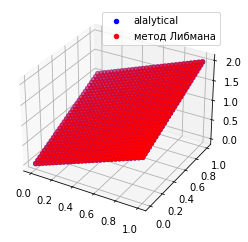

In [14]:
R3_plot(liebman_method, "метод Либмана")

RMSE =  6.326032273250456e-17


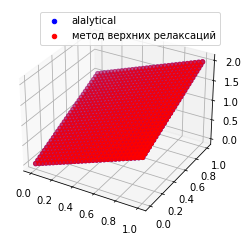

In [15]:
R3_plot(relaxation_method, "метод верхних релаксаций")

RMSE =  8.817462896590622e-17


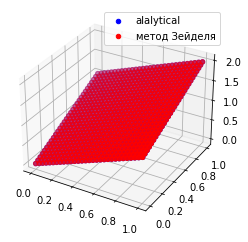

In [16]:
R3_plot(zeidel_method, "метод Зейделя")